#### 1
### RamenDesu Project
#### Ramen Ratings Data

In [1]:
# 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/raw/ramen-ratings.csv')

# Display the first few rows
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [2]:
# 3
# Knowing the Data Types
print(df.dtypes)

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object


In [3]:
# 4
# Checking Missing Values
print(df.isnull().sum())

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64


In [4]:
# 5
# Percentage of Missing Values in Data
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

Review #     0.000000
Brand        0.000000
Variety      0.000000
Style        0.077519
Country      0.000000
Stars        0.000000
Top Ten     98.410853
dtype: float64


In [5]:
# 6
# Check for Duplicates
print("\nDuplicated Rows: ", df.duplicated().sum())


Duplicated Rows:  0


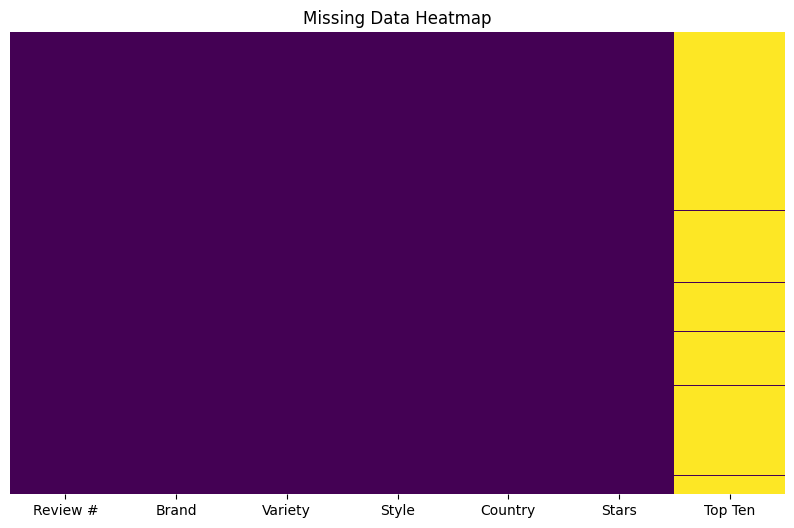

In [6]:
# 7
# Visualizing Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
# 8
# Check unique values in 'Top Ten' column
print("Unique values in Top Ten (first 20):", df['Top Ten'].unique()[:20])

# Handling Missing Values in 'Top Ten'
# Since 'NaN' implies the ramen wasn't in the top ten, we can fill it with 'Not Ranked'
df['Top Ten'] = df['Top Ten'].fillna('Not Ranked')

# Check the count of values now
print("\nValue counts after filling NaN:")
print(df['Top Ten'].value_counts())

Unique values in Top Ten (first 20): [nan '2016 #10' '2016 #1' '2016 #8' '2016 #5' '2016 #9' '2016 #7'
 '2015 #10' '2015 #7' '2015 #4' '2015 #9' '2015 #6' '2015 #1' '2013 #10'
 '2015 #8' '2014 #7' '2014 #4' '2014 #9' '2014 #10' '2014 #8']

Value counts after filling NaN:
Top Ten
Not Ranked    2539
\r\n             4
2016 #10         1
2016 #8          1
2016 #5          1
2016 #9          1
2016 #1          1
2016 #7          1
2015 #10         1
2015 #4          1
2015 #7          1
2015 #6          1
2015 #1          1
2013 #10         1
2015 #9          1
2014 #7          1
2014 #4          1
2014 #9          1
2014 #10         1
2014 #8          1
2014 #5          1
2014 #6          1
2015 #8          1
2014 #1          1
2013 #1          1
2013 #2          1
2013 #4          1
2013 #9          1
2013 #3          1
2012 #10         1
2012 #7          1
2012 #5          1
2012 #3          1
2012 #6          1
2012 #9          1
2012 #1          1
2012 #2          1
2013 #6          

### Feature Engineering: Top Ten Year and Rank
The `Top Ten` column contains valuable information like "2016 #10". 
We will extract the **Year** and **Rank** into separate numerical columns (`Top_Year`, `Top_Rank`) to enable better analysis.


Sample of Ranked Ramen:


,Brand,Variety,Top Ten,Top_Year,Top_Rank
616,MAMA,Instant Noodles Coconut Milk Flavour,2016 #10,2016,10
633,Prima Taste,Singapore Laksa Wholegrain La Mian,2016 #1,2016,1
655,Prima,Juzz's Mee Creamy Chicken Flavour,2016 #8,2016,8
673,Prima Taste,Singapore Curry Wholegrain La Mian,2016 #5,2016,5
752,Tseng Noodles,Scallion With Sichuan Pepper Flavor,2016 #9,2016,9


C:\Users\Paulo\AppData\Local\Temp\ipykernel_13984\3443844295.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Top_Year', data=df[df['Top_Year'] > 0], palette='viridis')


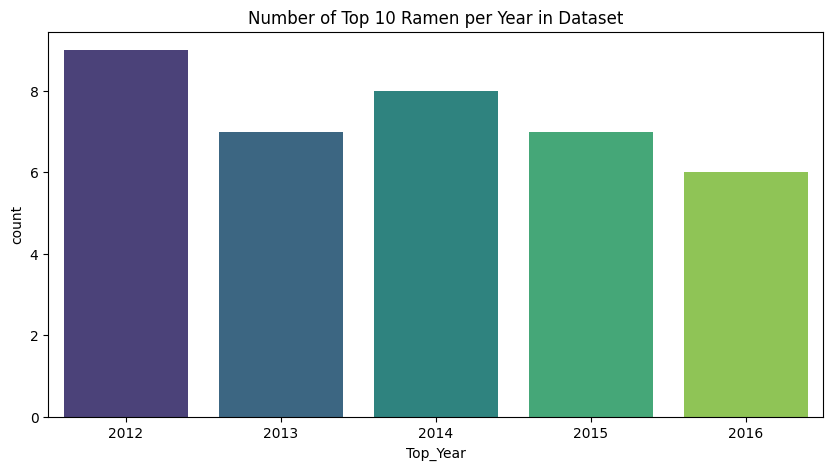

In [8]:
# 9
# Feature Engineering: Extracting Year and Rank

def extract_year_rank(val):
    if val == 'Not Ranked':
        return 0, 0
    try:
        # format is often 'YYYY #Rank' e.g. '2016 #10'
        parts = str(val).split()
        if len(parts) >= 2 and '#' in parts[1]:
            year = int(parts[0])
            rank = int(parts[1].replace('#', ''))
            return year, rank
        return 0, 0 
    except:
        return 0, 0

# Apply the function
df[['Top_Year', 'Top_Rank']] = df['Top Ten'].apply(
    lambda x: pd.Series(extract_year_rank(x))
)

# Visualizing the extracted data
print("\nSample of Ranked Ramen:")
display(df[df['Top_Rank'] > 0][['Brand', 'Variety', 'Top Ten', 'Top_Year', 'Top_Rank']].head())

# Check distribution of Years in rankings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='Top_Year', data=df[df['Top_Year'] > 0], palette='viridis')
plt.title('Number of Top 10 Ramen per Year in Dataset')
plt.show()

### Final Data Cleaning: Ratings, Styles, and Countries
Before visualizing, we need to:
1. **Stars**: Convert from object to float (removing "Unrated").
2. **Style**: Drop rows with missing styles.
3. **Country**: Standardize country names.

In [ ]:
# 11
# 1. Fix 'Stars' column
print("Star ratings before cleaning:", df['Stars'].dtype)

# Remove 'Unrated' and convert to float
df = df[df['Stars'] != 'Unrated'].copy()
df['Stars'] = df['Stars'].astype(float)
print("Star ratings after cleaning:", df['Stars'].dtype)

# 2. Fix 'Style' column
print("\nMissing Style values before:", df['Style'].isnull().sum())
df.dropna(subset=['Style'], inplace=True)

# 3. Standardize 'Country' column
df['Country'] = df['Country'].replace({
    'United States': 'USA', 
    'Holland': 'Netherlands',
    'UK': 'United Kingdom'
})

print("\nFinal Dataset Info:")
df.info()

In [ ]:
# 12
# Save the cleaned data for future use
df.to_csv('../data/data_cleaned.csv', index=False)
print("Cleaned dataset saved to '../data/data_cleaned.csv'")

## Data Visualizations
Now, let's look at the insights!

In [ ]:
# 13
# 1. Brand with Most Ramen
plt.figure(figsize=(12, 6))
brand_counts = df['Brand'].value_counts().head(20)
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='magma')
plt.title('Top 20 Brands with Most Ramen Varieties', fontsize=15)
plt.xlabel('Number of Varieties')
plt.ylabel('Brand')
plt.show()

In [ ]:
# 14
# 2. Country with Most Ramen Varieties
plt.figure(figsize=(12, 6))
country_counts = df['Country'].value_counts()
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title('Countries with Most Ramen Varieties', fontsize=15)
plt.xlabel('Number of Varieties')
plt.ylabel('Country')
plt.show()

In [ ]:
# 15
# 3. Packaging Style Preferences
plt.figure(figsize=(8, 8))
style_counts = df['Style'].value_counts()

# Group values < 1.5% into 'Others' to avoid overlapping labels
threshold = 0.015 * style_counts.sum()
mask = style_counts < threshold
style_counts_final = style_counts[~mask].copy()
if mask.any():
    style_counts_final['Others'] = style_counts[mask].sum()

plt.pie(style_counts_final, labels=style_counts_final.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Ramen Packaging Styles', fontsize=15)
plt.show()

In [ ]:
# 16
# 4. Top Brand Ramen (Average Stars)
brands_min_10 = df['Brand'].value_counts()
brands_min_10 = brands_min_10[brands_min_10 >= 10].index

top_brands_rating = df[df['Brand'].isin(brands_min_10)].groupby('Brand')['Stars'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands_rating.values, y=top_brands_rating.index, palette='viridis')
plt.title('Top 20 Brands by Average Star Rating (Min. 10 products)', fontsize=15)
plt.xlabel('Average Star Rating')
plt.ylabel('Brand')
plt.xlim(0, 5)
plt.show()